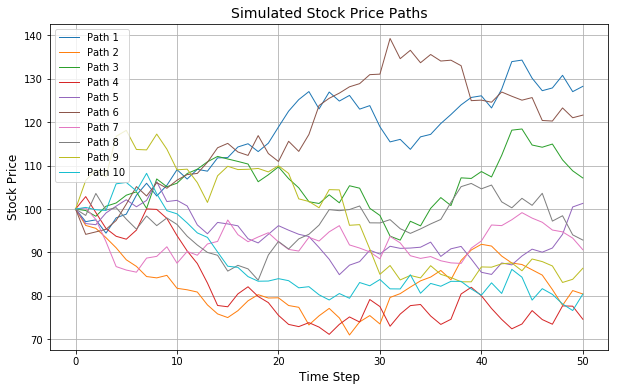

American Call Option Price using Monte Carlo Simulation: 10.75


In [21]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

def monte_carlo_american_call(S0, K, T, r, sigma, num_simulations, num_timesteps):
    dt = T / num_timesteps  # Time step
    prices = np.zeros((num_simulations, num_timesteps + 1))  # Simulated paths
    payoffs = np.zeros(num_simulations)

    # Simulate price paths
    for i in range(num_simulations):
        prices[i, 0] = S0
        for t in range(1, num_timesteps + 1):
            Z = np.random.normal(0, 1)  # Standard normal random variable
            prices[i, t] = prices[i, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Calculate intrinsic values at maturity
    payoffs = np.maximum(prices[:, -1] - K, 0)

    # Backward induction
    for t in range(num_timesteps - 1, 0, -1):
        in_the_money = prices[:, t] > K
        if np.sum(in_the_money) >= 3:  # Prevent polyfit warnings by checking number of points
            regression = np.polyfit(prices[in_the_money, t], payoffs[in_the_money] * np.exp(-r * dt), 2)
            continuation_value = np.polyval(regression, prices[in_the_money, t])
            exercise_value = prices[in_the_money, t] - K
            payoffs[in_the_money] = np.maximum(exercise_value, continuation_value)
        else:
            # If too few points for a quadratic fit, exercise if in the money
            payoffs[in_the_money] = prices[in_the_money, t] - K

    # Discount the remaining payoffs
    option_price = np.mean(payoffs * np.exp(-r * dt))

    # Plot stock price paths (only a few paths for clarity)
    plt.figure(figsize=(10, 6))
    for i in range(min(10, num_simulations)):  # Display only a few paths for clarity
        plt.plot(prices[i, :], lw=1)
    plt.xlabel("Time Step", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.title("Simulated Stock Price Paths", fontsize=14)

    # Add legend for the first few paths
    plt.legend([f"Path {i+1}" for i in range(min(10, num_simulations))], loc='upper left', fontsize=10)

    plt.grid(True)
    plt.show()  # Ensure plot displays in Jupyter Notebook

    return option_price

# Example usage
S0 = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to expiration in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
num_simulations = 10000  # Number of simulations
num_timesteps = 50  # Number of timesteps

american_call_price = monte_carlo_american_call(S0, K, T, r, sigma, num_simulations, num_timesteps)
print(f"American Call Option Price using Monte Carlo Simulation: {american_call_price:.2f}")
